Based on [https://snowex-2021.hackweek.io/tutorials/geospatial/SNOTEL_query.html](https://snowex-2021.hackweek.io/tutorials/geospatial/SNOTEL_query.html)

In [1]:
import os
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import ulmo

In [2]:
path_to_data = '/data/projects/Comet/cwp140/' 
path_to_out  = '../out/'       # output files (numerical results, intermediate datafiles) -- read & write
path_to_figs = '../figs/'      # figures

In [3]:
#This is the latest CUAHSI API endpoint
wsdlurl = 'https://hydroportal.cuahsi.org/Snotel/cuahsi_1_1.asmx?WSDL'
sites = ulmo.cuahsi.wof.get_sites(wsdlurl)

In [4]:
#Preview first item in dictionary
next(iter(sites.items()))

('SNOTEL:301_CA_SNTL',
 {'code': '301_CA_SNTL',
  'name': 'Adin Mtn',
  'network': 'SNOTEL',
  'location': {'latitude': '41.2358283996582',
   'longitude': '-120.79192352294922'},
  'elevation_m': '1886.7120361328125',
  'site_property': {'county': 'Modoc',
   'state': 'California',
   'site_comments': 'beginDate=10/1/1983 12:00:00 AM|endDate=1/1/2100 12:00:00 AM|HUC=180200021403|HUD=18020002|TimeZone=-8.0|actonId=20H13S|shefId=ADMC1|stationTriplet=301:CA:SNTL|isActive=True',
   'pos_accuracy_m': '0'}})

In [5]:
sites_df = pd.DataFrame.from_dict(sites, orient='index').dropna()
sites_df.head()

,code,name,network,location,elevation_m,site_property
SNOTEL:301_CA_SNTL,301_CA_SNTL,Adin Mtn,SNOTEL,"{'latitude': '41.2358283996582', 'longitude': ...",1886.7120361328125,"{'county': 'Modoc', 'state': 'California', 'si..."
SNOTEL:907_UT_SNTL,907_UT_SNTL,Agua Canyon,SNOTEL,"{'latitude': '37.522171020507813', 'longitude'...",2712.719970703125,"{'county': 'Kane', 'state': 'Utah', 'site_comm..."
SNOTEL:916_MT_SNTL,916_MT_SNTL,Albro Lake,SNOTEL,"{'latitude': '45.59722900390625', 'longitude':...",2529.840087890625,"{'county': 'Madison', 'state': 'Montana', 'sit..."
SNOTEL:1267_AK_SNTL,1267_AK_SNTL,Alexander Lake,SNOTEL,"{'latitude': '61.749668121337891', 'longitude'...",48.768001556396484,"{'county': 'Matanuska-Susitna', 'state': 'Alas..."
SNOTEL:908_WA_SNTL,908_WA_SNTL,Alpine Meadows,SNOTEL,"{'latitude': '47.779571533203125', 'longitude'...",1066.800048828125,"{'county': 'King', 'state': 'Washington', 'sit..."


In [6]:
sites_df['geometry'] = [Point(float(loc['longitude']), float(loc['latitude'])) for loc in sites_df['location']]

In [7]:
sites_df = sites_df.drop(columns='location')
sites_df = sites_df.astype({"elevation_m":float})

In [8]:
sites_df.head()

,code,name,network,elevation_m,site_property,geometry
SNOTEL:301_CA_SNTL,301_CA_SNTL,Adin Mtn,SNOTEL,1886.712036,"{'county': 'Modoc', 'state': 'California', 'si...",POINT (-120.79192352294922 41.2358283996582)
SNOTEL:907_UT_SNTL,907_UT_SNTL,Agua Canyon,SNOTEL,2712.719971,"{'county': 'Kane', 'state': 'Utah', 'site_comm...",POINT (-112.27117919921875 37.52217102050781)
SNOTEL:916_MT_SNTL,916_MT_SNTL,Albro Lake,SNOTEL,2529.840088,"{'county': 'Madison', 'state': 'Montana', 'sit...",POINT (-111.95902252197266 45.59722900390625)
SNOTEL:1267_AK_SNTL,1267_AK_SNTL,Alexander Lake,SNOTEL,48.768002,"{'county': 'Matanuska-Susitna', 'state': 'Alas...",POINT (-150.88966369628906 61.74966812133789)
SNOTEL:908_WA_SNTL,908_WA_SNTL,Alpine Meadows,SNOTEL,1066.800049,"{'county': 'King', 'state': 'Washington', 'sit...",POINT (-121.69847106933594 47.779571533203125)


In [9]:
sites_df.loc['SNOTEL:301_CA_SNTL']

code                                                   301_CA_SNTL
name                                                      Adin Mtn
network                                                     SNOTEL
elevation_m                                            1886.712036
site_property    {'county': 'Modoc', 'state': 'California', 'si...
geometry              POINT (-120.79192352294922 41.2358283996582)
Name: SNOTEL:301_CA_SNTL, dtype: object

In [10]:
sites_df.loc['SNOTEL:301_CA_SNTL']['site_property']

{'county': 'Modoc',
 'state': 'California',
 'site_comments': 'beginDate=10/1/1983 12:00:00 AM|endDate=1/1/2100 12:00:00 AM|HUC=180200021403|HUD=18020002|TimeZone=-8.0|actonId=20H13S|shefId=ADMC1|stationTriplet=301:CA:SNTL|isActive=True',
 'pos_accuracy_m': '0'}

In [11]:
sites_gdf_all = gpd.GeoDataFrame(sites_df, crs='EPSG:4326')
sites_gdf_all.head()

,code,name,network,elevation_m,site_property,geometry
SNOTEL:301_CA_SNTL,301_CA_SNTL,Adin Mtn,SNOTEL,1886.712036,"{'county': 'Modoc', 'state': 'California', 'si...",POINT (-120.79192 41.23583)
SNOTEL:907_UT_SNTL,907_UT_SNTL,Agua Canyon,SNOTEL,2712.719971,"{'county': 'Kane', 'state': 'Utah', 'site_comm...",POINT (-112.27118 37.52217)
SNOTEL:916_MT_SNTL,916_MT_SNTL,Albro Lake,SNOTEL,2529.840088,"{'county': 'Madison', 'state': 'Montana', 'sit...",POINT (-111.95902 45.59723)
SNOTEL:1267_AK_SNTL,1267_AK_SNTL,Alexander Lake,SNOTEL,48.768002,"{'county': 'Matanuska-Susitna', 'state': 'Alas...",POINT (-150.88966 61.74967)
SNOTEL:908_WA_SNTL,908_WA_SNTL,Alpine Meadows,SNOTEL,1066.800049,"{'county': 'King', 'state': 'Washington', 'sit...",POINT (-121.69847 47.77957)


In [12]:
#geojson of state polygons
states_url = 'http://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_5m.json'
states_gdf = gpd.read_file(states_url)

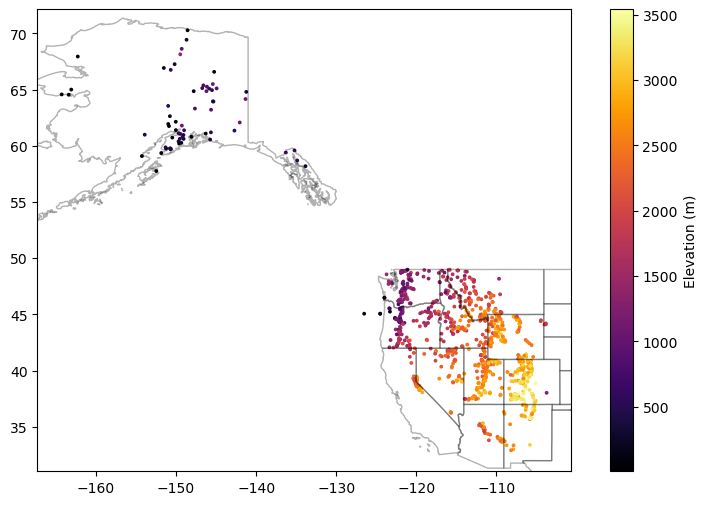

In [13]:
f, ax = plt.subplots(figsize=(10,6))
sites_gdf_all.plot(ax=ax, column='elevation_m', markersize=3, cmap='inferno', legend=True, legend_kwds={'label': "Elevation (m)"})
#This prevents matplotlib from updating the axes extent (states polygons cover larger area than SNOTEL points)
ax.autoscale(False)
states_gdf.plot(ax=ax, facecolor='none', edgecolor='k', alpha=0.3);

In [14]:
sites_gdf_conus = sites_gdf_all[(sites_gdf_all.index.str.contains('CO'))]


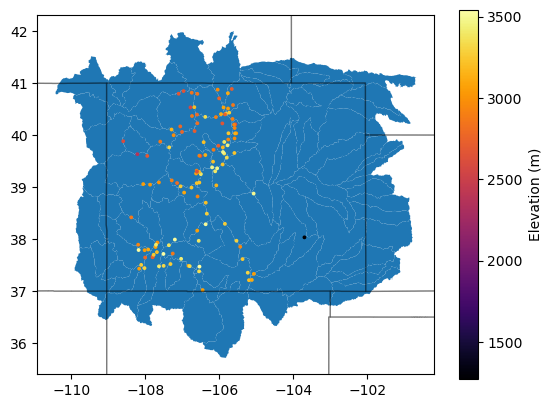

In [15]:
## create a list of HUC8 watersheds we are interested in

## use geopandas to import the shapefile
fp = path_to_data + 'downloads/CO_HUC8/wbdhu8.shp'
polys = gpd.read_file(fp, crs="epsg:4326") # have to manually set the projection

fig, ax = plt.subplots() # initiates a figure
polys.plot(ax=ax); # plots all lines

sites_gdf_conus.plot(ax=ax, column='elevation_m', markersize=3, cmap='inferno', legend=True, legend_kwds={'label': "Elevation (m)"})
ax.autoscale(False)
states_gdf.plot(ax=ax, facecolor='none', edgecolor='k', alpha=0.3);

In [16]:
sites_fn = 'snotel_conus_sites.json'
if not os.path.exists(sites_fn):
    sites_gdf_conus.to_file(sites_fn, driver='GeoJSON')

In [17]:
sites_gdf_conus

,code,name,network,elevation_m,site_property,geometry
SNOTEL:303_CO_SNTL,303_CO_SNTL,Apishapa,SNOTEL,3048.000000,"{'county': 'Huerfano', 'state': 'Colorado', 's...",POINT (-105.06749 37.33062)
SNOTEL:1030_CO_SNTL,1030_CO_SNTL,Arapaho Ridge,SNOTEL,3340.607910,"{'county': 'Grand', 'state': 'Colorado', 'site...",POINT (-106.38142 40.35098)
SNOTEL:305_CO_SNTL,305_CO_SNTL,Arrow,SNOTEL,2950.464111,"{'county': 'Grand', 'state': 'Colorado', 'site...",POINT (-105.76083 39.91550)
SNOTEL:322_CO_SNTL,322_CO_SNTL,Bear Lake,SNOTEL,2895.600098,"{'county': 'Larimer', 'state': 'Colorado', 'si...",POINT (-105.64483 40.31118)
SNOTEL:1061_CO_SNTL,1061_CO_SNTL,Bear River,SNOTEL,2767.583984,"{'county': 'Routt', 'state': 'Colorado', 'site...",POINT (-107.00955 40.06153)
...,...,...,...,...,...,...
SNOTEL:1042_CO_SNTL,1042_CO_SNTL,Wild Basin,SNOTEL,2913.887939,"{'county': 'Boulder', 'state': 'Colorado', 'si...",POINT (-105.60248 40.20105)
SNOTEL:869_CO_SNTL,869_CO_SNTL,Willow Creek Pass,SNOTEL,2907.791992,"{'county': 'Grand', 'state': 'Colorado', 'site...",POINT (-106.09433 40.34703)
SNOTEL:870_CO_SNTL,870_CO_SNTL,Willow Park,SNOTEL,3261.360107,"{'county': 'Larimer', 'state': 'Colorado', 'si...",POINT (-105.73337 40.43254)
SNOTEL:874_CO_SNTL,874_CO_SNTL,Wolf Creek Summit,SNOTEL,3352.800049,"{'county': 'Mineral', 'state': 'Colorado', 'si...",POINT (-106.80170 37.47922)


In [18]:
sites_gdf_conus['name'].values

array(['Apishapa', 'Arapaho Ridge', 'Arrow', 'Bear Lake', 'Bear River',
       'Beartown', 'Beaver Ck Village', 'Berthoud Summit', 'Bison Lake',
       'Black Mesa', 'Black Mountain', 'Brumley', 'Buckskin Joe',
       'Buffalo Park', 'Burro Mountain', 'Butte', 'Cascade', 'Cascade #2',
       'Cathedral Bluffs', 'Chapman Tunnel', 'Cochetopa Pass',
       'Columbine', 'Columbine Pass', 'Columbus Basin', 'Copeland Lake',
       'Copper Mountain', 'Crosho', 'Culebra #2', 'Cumbres Trestle',
       'Deadman Hill', 'Dry Lake', 'Echo Lake', 'El Diente Peak',
       'Elk River', 'Elkhead Divide', 'Elliot Ridge', 'Fool Creek',
       'Fremont Pass', 'Glen Cove', 'Grayback', 'Grizzly Peak',
       'Hagerman Tunnel', 'Hayden Pass', 'High Lonesome', 'Hoosier Pass',
       'Hourglass Lake', 'Idarado', 'Independence Pass', 'Ivanhoe',
       'Jackwhacker Gulch', 'Joe Wright', 'Jones Pass', 'Kiln',
       'Lake Eldora', 'Lake Irene', 'Lily Pond', 'Lizard Head Pass',
       'Lone Cone', 'Long Draw Resv'

In [19]:
idx = (sites_gdf_conus['name'] == 'Tower')

sitecode = sites_gdf_conus.loc[idx].index.values[0]
sitecode

'SNOTEL:825_CO_SNTL'

In [20]:
# sitecode = sites_gdf_conus.index[-1]
# sitecode

In [21]:
ulmo.cuahsi.wof.get_site_info(wsdlurl, sitecode)['series'].keys()

dict_keys(['SNOTEL:BATN_D', 'SNOTEL:BATT_D', 'SNOTEL:BATT_H', 'SNOTEL:BATX_D', 'SNOTEL:BATX_H', 'SNOTEL:PRCP_y', 'SNOTEL:PRCP_sm', 'SNOTEL:PRCP_m', 'SNOTEL:PRCP_wy', 'SNOTEL:PRCPSA_y', 'SNOTEL:PRCPSA_D', 'SNOTEL:PRCPSA_sm', 'SNOTEL:PRCPSA_m', 'SNOTEL:PRCPSA_wy', 'SNOTEL:PREC_sm', 'SNOTEL:PREC_m', 'SNOTEL:PREC_wy', 'SNOTEL:SNWD_D', 'SNOTEL:SNWD_sm', 'SNOTEL:SNWD_H', 'SNOTEL:SNWD_m', 'SNOTEL:TAVG_y', 'SNOTEL:TAVG_D', 'SNOTEL:TAVG_sm', 'SNOTEL:TAVG_m', 'SNOTEL:TAVG_wy', 'SNOTEL:TMAX_y', 'SNOTEL:TMAX_D', 'SNOTEL:TMAX_sm', 'SNOTEL:TMAX_m', 'SNOTEL:TMAX_wy', 'SNOTEL:TMIN_y', 'SNOTEL:TMIN_D', 'SNOTEL:TMIN_sm', 'SNOTEL:TMIN_m', 'SNOTEL:TMIN_wy', 'SNOTEL:TOBS_D', 'SNOTEL:TOBS_sm', 'SNOTEL:TOBS_H', 'SNOTEL:TOBS_m', 'SNOTEL:WDIRV_D', 'SNOTEL:WDIRV_sm', 'SNOTEL:WDIRV_H', 'SNOTEL:WDIRV_m', 'SNOTEL:WSPDV_D', 'SNOTEL:WSPDV_sm', 'SNOTEL:WSPDV_H', 'SNOTEL:WSPDV_m', 'SNOTEL:WSPDX_D', 'SNOTEL:WSPDX_sm', 'SNOTEL:WSPDX_H', 'SNOTEL:WSPDX_m', 'SNOTEL:WTEQ_D', 'SNOTEL:WTEQ_sm', 'SNOTEL:WTEQ_H', 'SNOTEL:WTEQ_m

In [22]:
#Daily SWE
variablecode = 'SNOTEL:WTEQ_D'

In [23]:
ulmo.cuahsi.wof.get_variable_info(wsdlurl, variablecode)

{'value_type': 'Field Observation',
 'data_type': 'Continuous',
 'general_category': 'Soil',
 'sample_medium': 'Snow',
 'no_data_value': '-9999',
 'speciation': 'Not Applicable',
 'code': 'WTEQ_D',
 'id': '310',
 'name': 'Snow water equivalent',
 'vocabulary': 'SNOTEL',
 'time': {'is_regular': True,
  'interval': '1',
  'units': {'abbreviation': 'd',
   'code': '104',
   'name': 'day',
   'type': 'Time'}},
 'units': {'abbreviation': 'in',
  'code': '49',
  'name': 'international inch',
  'type': 'Length'}}

In [24]:
#Get current datetime
today = datetime.today().strftime('%Y-%m-%d')

def snotel_fetch(sitecode, variablecode='SNOTEL:SNWD_D', start_date='1950-10-01', end_date=today):
    #print(sitecode, variablecode, start_date, end_date)
    values_df = None
    try:
        #Request data from the server
        site_values = ulmo.cuahsi.wof.get_values(wsdlurl, sitecode, variablecode, start=start_date, end=end_date)
        #Convert to a Pandas DataFrame   
        values_df = pd.DataFrame.from_dict(site_values['values'])
        #Parse the datetime values to Pandas Timestamp objects
        values_df['datetime'] = pd.to_datetime(values_df['datetime'], utc=True)
        #Set the DataFrame index to the Timestamps
        values_df = values_df.set_index('datetime')
        #Convert values to float and replace -9999 nodata values with NaN
        values_df['value'] = pd.to_numeric(values_df['value']).replace(-9999, np.nan)
        #Remove any records flagged with lower quality
        values_df = values_df[values_df['quality_control_level_code'] == '1']
    except:
        print("Unable to fetch %s" % variablecode)

    return values_df

In [25]:
#Get all records, can filter later
start_date = datetime(1950,1,1)
end_date = datetime.today()

print(sitecode)
values_df = snotel_fetch(sitecode, variablecode, start_date, end_date)
values_df.shape

SNOTEL:825_CO_SNTL


(16200, 8)

In [26]:
values_df.head()

,value,qualifiers,censor_code,date_time_utc,method_id,method_code,source_code,quality_control_level_code
datetime,,,,,,,,
1979-10-01 00:00:00+00:00,0.0,V,nc,1979-10-01T00:00:00,0,0,1,1
1979-10-02 00:00:00+00:00,0.0,V,nc,1979-10-02T00:00:00,0,0,1,1
1979-10-03 00:00:00+00:00,0.0,V,nc,1979-10-03T00:00:00,0,0,1,1
1979-10-04 00:00:00+00:00,0.0,V,nc,1979-10-04T00:00:00,0,0,1,1
1979-10-05 00:00:00+00:00,0.0,V,nc,1979-10-05T00:00:00,0,0,1,1


In [27]:
#Get number of decimal years between first and last observation
nyears = (values_df.index.max() - values_df.index.min()).days/365.25
nyears

44.35044490075291

<Axes: xlabel='datetime'>

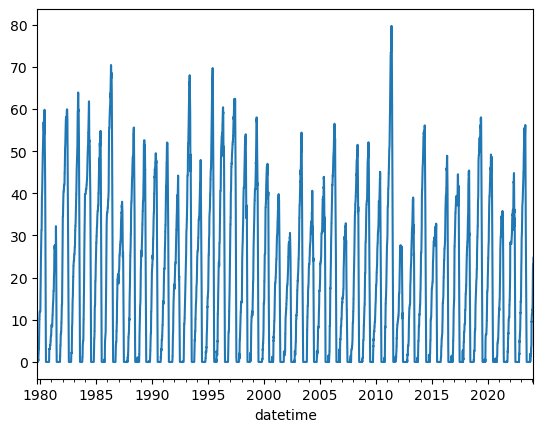

In [28]:
values_df['value'].plot()

In [29]:
values_df['SWE_diff'] = values_df['value'].diff()
values_df

,value,qualifiers,censor_code,date_time_utc,method_id,method_code,source_code,quality_control_level_code,SWE_diff
datetime,,,,,,,,,
1979-10-01 00:00:00+00:00,0.0,V,nc,1979-10-01T00:00:00,0,0,1,1,NaN
1979-10-02 00:00:00+00:00,0.0,V,nc,1979-10-02T00:00:00,0,0,1,1,0.0
1979-10-03 00:00:00+00:00,0.0,V,nc,1979-10-03T00:00:00,0,0,1,1,0.0
1979-10-04 00:00:00+00:00,0.0,V,nc,1979-10-04T00:00:00,0,0,1,1,0.0
1979-10-05 00:00:00+00:00,0.0,V,nc,1979-10-05T00:00:00,0,0,1,1,0.0
...,...,...,...,...,...,...,...,...,...
2024-02-02 00:00:00+00:00,23.2,V,nc,2024-02-02T00:00:00,0,0,1,1,0.1
2024-02-03 00:00:00+00:00,23.5,V,nc,2024-02-03T00:00:00,0,0,1,1,0.3
2024-02-04 00:00:00+00:00,24.4,V,nc,2024-02-04T00:00:00,0,0,1,1,0.9


In [30]:
## plot a time series of event we are looking at
idx = (values_df.index > '2019-12-09') & (values_df.index < '2019-12-17')
tmp = values_df.loc[idx]
tmp

,value,qualifiers,censor_code,date_time_utc,method_id,method_code,source_code,quality_control_level_code,SWE_diff
datetime,,,,,,,,,
2019-12-10 00:00:00+00:00,13.1,V,nc,2019-12-10T00:00:00,0,0,1,1,0.5
2019-12-11 00:00:00+00:00,13.1,V,nc,2019-12-11T00:00:00,0,0,1,1,0.0
2019-12-12 00:00:00+00:00,13.2,V,nc,2019-12-12T00:00:00,0,0,1,1,0.1
2019-12-13 00:00:00+00:00,14.3,V,nc,2019-12-13T00:00:00,0,0,1,1,1.1
2019-12-14 00:00:00+00:00,14.9,V,nc,2019-12-14T00:00:00,0,0,1,1,0.6
2019-12-15 00:00:00+00:00,16.7,E,nc,2019-12-15T00:00:00,0,0,1,1,1.8
2019-12-16 00:00:00+00:00,16.7,E,nc,2019-12-16T00:00:00,0,0,1,1,0.0


In [32]:
tmp.SWE_diff.values

array([0.5, 0. , 0.1, 1.1, 0.6, 1.8, 0. ])

In [29]:
SWE_thres = values_df['SWE_diff'].describe(percentiles=[.90]).loc['90%'] # 95th percentile precipitation threshold
print(SWE_thres)

0.5


In [ ]:
idx = (values_df['SWE_diff'] >= SWE_thres) & (values_df.index.year >= 2019)
df = values_df.loc[idx]
df

In [ ]:
df['SWE_diff'][0:50]

In [59]:
df['date_time_utc'].values

array(['2019-01-07T00:00:00', '2019-01-08T00:00:00',
       '2019-01-17T00:00:00', '2019-01-18T00:00:00',
       '2019-01-19T00:00:00', '2019-01-25T00:00:00',
       '2019-02-07T00:00:00', '2019-02-14T00:00:00',
       '2019-02-15T00:00:00', '2019-02-16T00:00:00',
       '2019-02-17T00:00:00', '2019-03-02T00:00:00',
       '2019-03-03T00:00:00', '2019-03-07T00:00:00',
       '2019-03-09T00:00:00', '2019-04-30T00:00:00',
       '2019-05-01T00:00:00', '2019-05-22T00:00:00',
       '2019-05-29T00:00:00', '2019-06-22T00:00:00',
       '2019-06-24T00:00:00', '2019-10-21T00:00:00',
       '2019-10-22T00:00:00', '2019-12-06T00:00:00',
       '2019-12-09T00:00:00', '2019-12-13T00:00:00',
       '2019-12-15T00:00:00', '2020-01-02T00:00:00',
       '2020-01-18T00:00:00', '2020-02-07T00:00:00',
       '2020-02-08T00:00:00', '2020-02-17T00:00:00',
       '2020-02-18T00:00:00', '2020-02-25T00:00:00',
       '2020-04-17T00:00:00', '2020-04-24T00:00:00',
       '2020-05-03T00:00:00', '2020-10-26T00:0

In [48]:
stat_list = ['count','min','max','mean','std','median']
doy_stats = values_df.groupby('dowy')['value'].agg(stat_list)
doy_stats

KeyError: 'dowy'

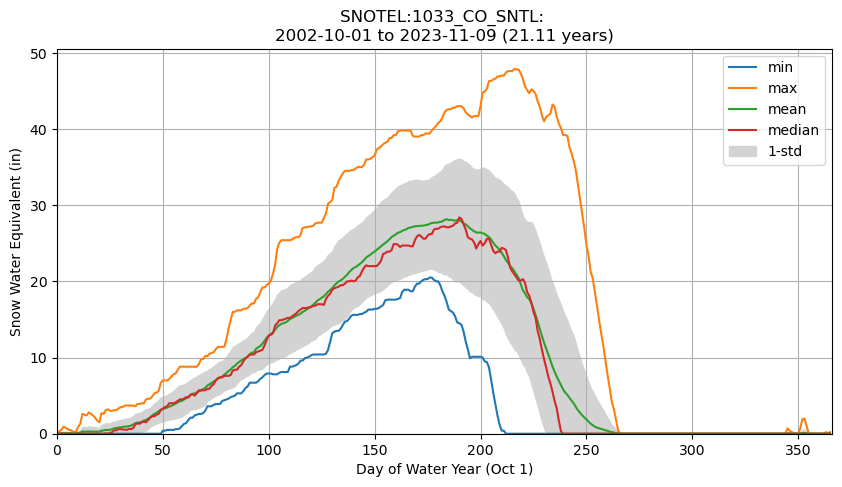

In [52]:
f,ax = plt.subplots(figsize=(10,5))

for stat in ['min','max','mean','median']:
    ax.plot(doy_stats.index, doy_stats[stat], label=stat)

ax.fill_between(doy_stats.index, doy_stats['mean'] - doy_stats['std'], doy_stats['mean'] + doy_stats['std'], \
                color='lightgrey', label='1-std')

title = f'{sitecode}: \n{values_df.index.min().date()} to {values_df.index.max().date()} ({nyears:.2f} years)'

ax.set_title(title)
ax.set_xlabel('Day of Water Year (Oct 1)')
ax.set_ylabel('Snow Water Equivalent (in)')
ax.grid()
ax.legend()
ax.set_xlim(0,366)
ax.set_ylim(bottom=0);